In [1]:
from math import sqrt, pow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as tm
import pandas as pd

In [2]:
# styles
sns.set_style("darkgrid")

In [3]:
# create arrays
array1 = np.random.rand(10000)
array1_checkpoints = [500, 1000, 2000, 4000, 8000, 10000]
array2 = np.random.rand(1000000)
array2_checkpoints = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1000000]

(array([20067., 19773., 19995., 19824., 20130., 19729., 19814., 20041.,
        19929., 20294., 19902., 20144., 20076., 19998., 20004., 20239.,
        20074., 19945., 20211., 19858., 20039., 19845., 20098., 20017.,
        19951., 20139., 20000., 20070., 20032., 20013., 20218., 20100.,
        19925., 19898., 19966., 19909., 20072., 19931., 19911., 19968.,
        19792., 19886., 20069., 20000., 20087., 20034., 20074., 20099.,
        19840., 19970.]),
 array([5.82612866e-07, 2.00005634e-02, 4.00005443e-02, 6.00005251e-02,
        8.00005059e-02, 1.00000487e-01, 1.20000468e-01, 1.40000448e-01,
        1.60000429e-01, 1.80000410e-01, 2.00000391e-01, 2.20000372e-01,
        2.40000353e-01, 2.60000333e-01, 2.80000314e-01, 3.00000295e-01,
        3.20000276e-01, 3.40000257e-01, 3.60000238e-01, 3.80000218e-01,
        4.00000199e-01, 4.20000180e-01, 4.40000161e-01, 4.60000142e-01,
        4.80000123e-01, 5.00000103e-01, 5.20000084e-01, 5.40000065e-01,
        5.60000046e-01, 5.80000027e-01

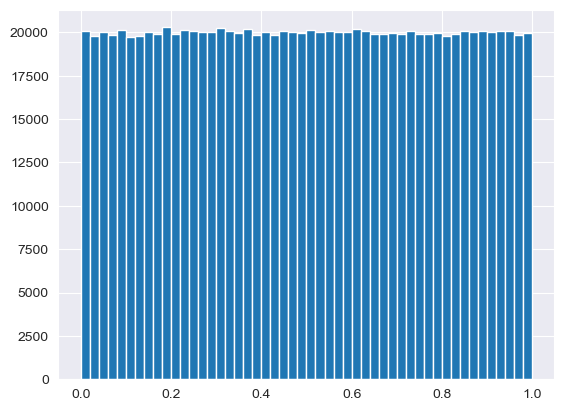

In [17]:
plt.hist(array2, bins=50)

In [4]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

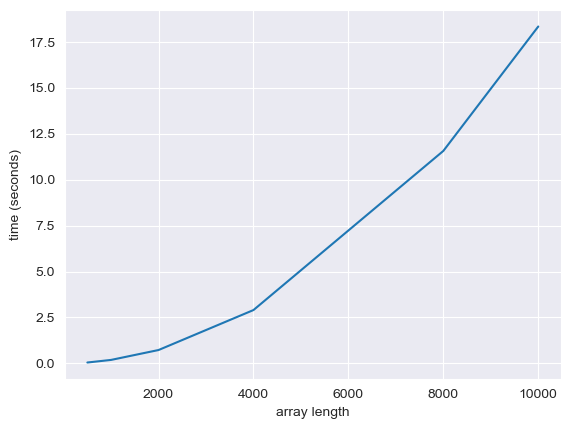

   length  time (seconds)
0     500        0.050883
1    1000        0.192356
2    2000        0.730552
3    4000        2.905239
4    8000       11.561528
5   10000       18.328739


In [5]:
exec_time_bubble = []
for value in array1_checkpoints:
    start_time = tm.time()
    array_bubble = array1[:value].copy()
    bubble_sort(array_bubble)
    exec_time_bubble.append(tm.time() - start_time)

plt.plot(array1_checkpoints, exec_time_bubble)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array1_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_bubble
print(table)

In [6]:
# Quick sort in Python
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])

    (array[i + 1], array[high]) = (array[high], array[i + 1])

    return i + 1

def quickSort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

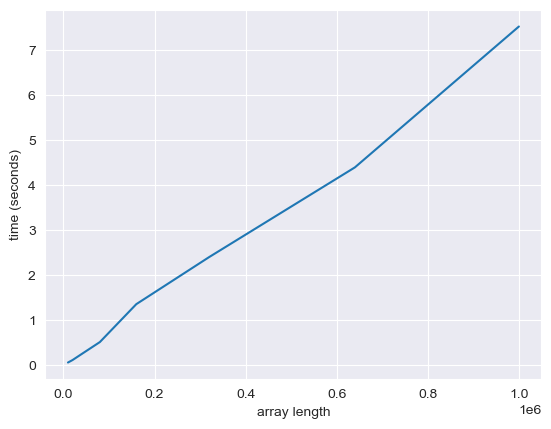

    length  time (seconds)
0    10000        0.054821
1    20000        0.109628
2    40000        0.243191
3    80000        0.509295
4   160000        1.351485
5   320000        2.398025
6   640000        4.391270
7  1000000        7.520851


In [7]:
exec_time_quick = []
for value in array2_checkpoints:
    start_time = tm.time()
    array_quick = array2[:value].copy()
    quickSort(array_quick, 0, value-1)
    exec_time_quick.append(tm.time() - start_time)

plt.plot(array2_checkpoints, exec_time_quick)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array2_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_quick
print(table)

In [8]:
# mergeSort
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort(L)
        mergeSort(R)
        i = j = k = 0
        
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

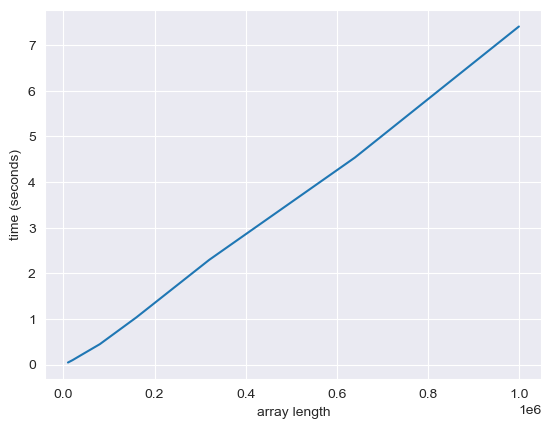

    length  time (seconds)
0    10000        0.047841
1    20000        0.099712
2    40000        0.217267
3    80000        0.450499
4   160000        1.035533
5   320000        2.296318
6   640000        4.538799
7  1000000        7.409311


In [9]:
exec_time_merge = []
for value in array2_checkpoints:
    start_time = tm.time()
    array_merge = array2[:value].copy()
    quickSort(array_merge, 0, value-1)
    exec_time_merge.append(tm.time() - start_time)

plt.plot(array2_checkpoints, exec_time_merge)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array2_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_merge
print(table)

In [10]:
# heap sort
def heapify(arr, N, i):
    largest = i
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2

    if l < N and arr[largest] < arr[l]:
        largest = l

    if r < N and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap

        heapify(arr, N, largest)

def heapSort(arr):
    N = len(arr)

    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)

    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

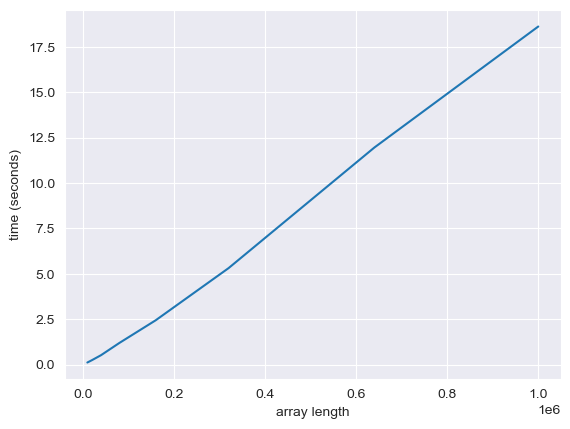

    length  time (seconds)
0    10000        0.111630
1    20000        0.240191
2    40000        0.515315
3    80000        1.184048
4   160000        2.436854
5   320000        5.308204
6   640000       11.946278
7  1000000       18.612723


In [11]:
exec_time_heap = []
for value in array2_checkpoints:
    start_time = tm.time()
    array_heap = array2[:value].copy()
    heapSort(array_heap)
    exec_time_heap.append(tm.time() - start_time)

plt.plot(array2_checkpoints, exec_time_heap)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array2_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_heap
print(table)


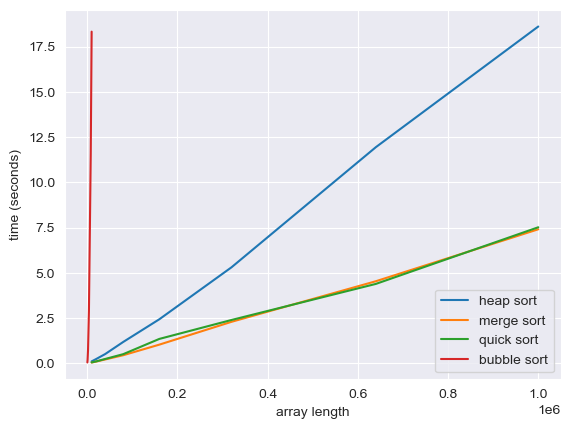

In [15]:
plt.plot(array2_checkpoints, exec_time_heap)
plt.plot(array2_checkpoints, exec_time_merge)
plt.plot(array2_checkpoints, exec_time_quick)
plt.plot(array1_checkpoints, exec_time_bubble)
plt.legend(['heap sort', 'merge sort', 'quick sort', 'bubble sort'])
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()